In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.models.spots import add_spherical_harmonic_spot, add_spherical_harmonic_spots
from spice.plots import plot_3D, plot_3D_mesh_and_spectrum
from spice.spectrum import simulate_observed_flux
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import Blackbody
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


from jax import config
config.update('jax_platform_name', 'cpu')

bb = Blackbody()

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:245: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_nump

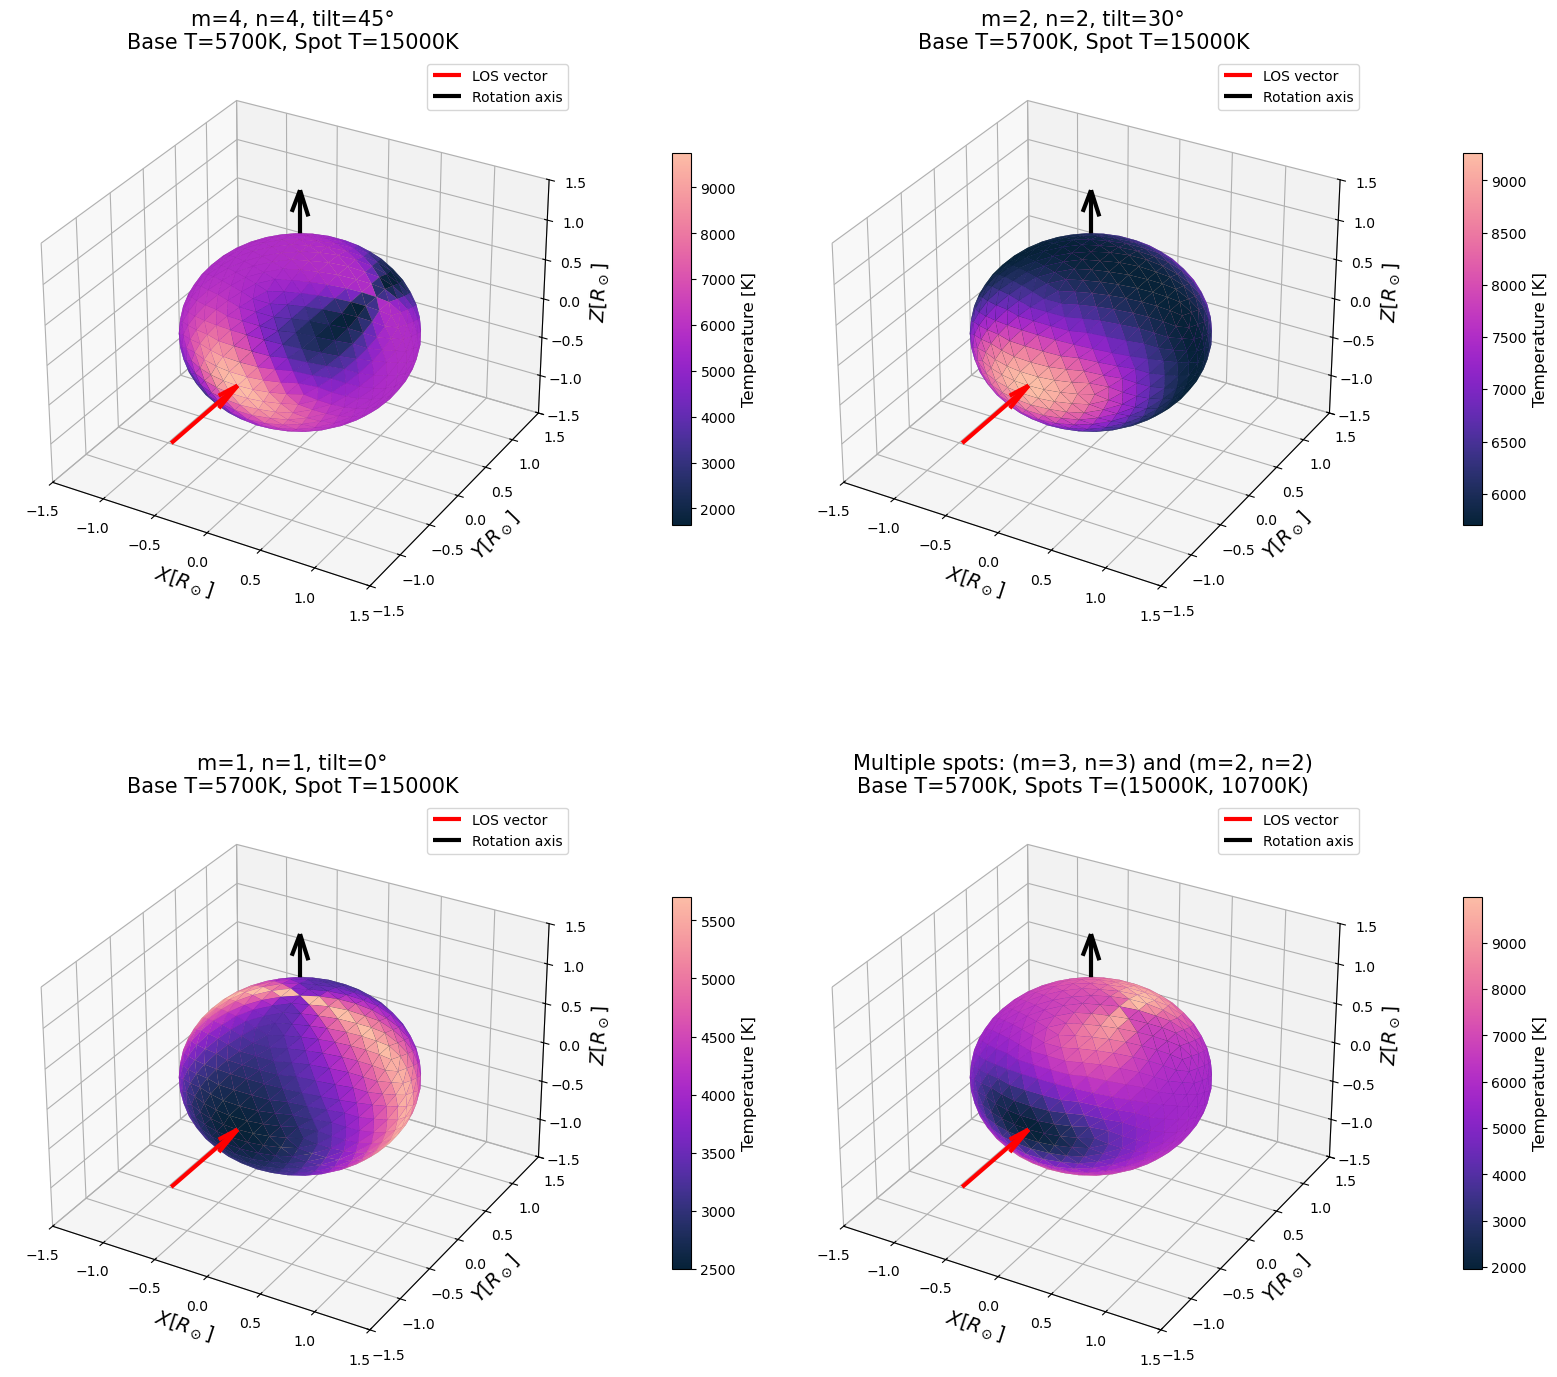

In [2]:
base_temp = 5700
spot_temp = 15000

# Create base model
m = IcosphereModel.construct(1000, 1., 1., bb.to_parameters(dict(teff=base_temp)), bb.parameter_names)

# Create a 2x2 grid of spot configurations
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axes = [
    [fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2, projection='3d')],
    [fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4, projection='3d')]
]

# Configuration 1: m=4, n=4 spot
m_spotted1 = add_spherical_harmonic_spot(
    m,
    4, # m order
    4, # n degree
    param_delta=9300,
    param_index=0,
    tilt_axis=jnp.array([0., 1., 0.]),
    tilt_angle=45.
)
ax1 = plot_3D(m_spotted1, property=0, axes=(fig, axes[0][0]), property_label="Temperature [K]")
axes[0][0].set_title(f"m=4, n=4, tilt=45°\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 2: m=2, n=2 spot
m_spotted2 = add_spherical_harmonic_spot(
    m,
    2, # m order
    2, # n degree
    param_delta=9300,
    param_index=0,
    tilt_axis=jnp.array([0., 1., 0.])
)
ax2 = plot_3D(m_spotted2, property=0, axes=(fig, axes[0][1]), property_label="Temperature [K]")
axes[0][1].set_title(f"m=2, n=2, tilt=30°\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 3: m=1, n=1 spot
m_spotted3 = add_spherical_harmonic_spot(
    m,
    1, # m order
    1, # n degree
    param_delta=9300,
    param_index=0,
    tilt_axis=jnp.array([0., 1., 0.]),
    tilt_angle=0.
)
ax3 = plot_3D(m_spotted3, property=0, axes=(fig, axes[1][0]), property_label="Temperature [K]")
axes[1][0].set_title(f"m=1, n=1, tilt=0°\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 4: Multiple spots
m_spotted4 = add_spherical_harmonic_spots(
    m,
    [3, 2], # m orders
    [3, 2], # n degrees
    param_deltas=[9300, 5000],
    param_indices=[0, 0],
    tilt_axes=jnp.array([jnp.array([0., 1., 0.]), jnp.array([1., 0., 0.])]),
    tilt_angles=jnp.array([20., 70.])
)
ax4 = plot_3D(m_spotted4, property=0, axes=(fig, axes[1][1]), property_label="Temperature [K]")
axes[1][1].set_title(f"Multiple spots: (m=3, n=3) and (m=2, n=2)\nBase T={base_temp}K, Spots T=({base_temp+9300}K, {base_temp+5000}K)",
                     fontsize=15)

plt.tight_layout()

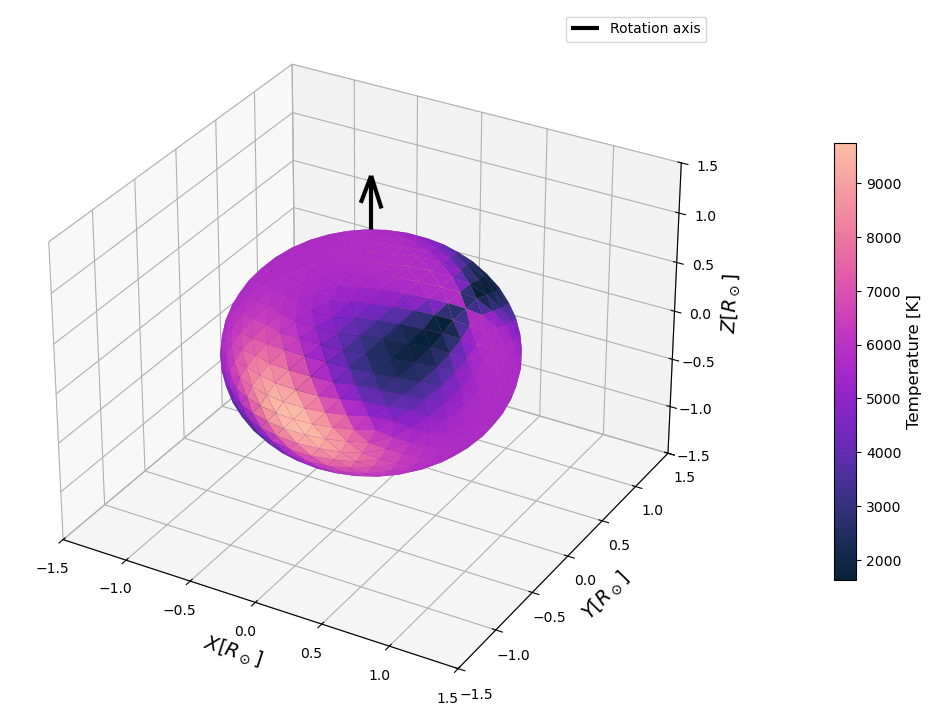

In [9]:
# Configuration 1: m=4, n=4 spot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

m_spotted1 = add_spherical_harmonic_spot(
    m,
    4, # m order
    4, # n degree
    param_delta=9300,
    param_index=0,
    tilt_axis=jnp.array([0., 1., 0.]),
    tilt_angle=45.
)
ax1 = plot_3D(m_spotted1, property=0, axes=(fig, ax), property_label="Temperature [K]", draw_los_vector=False, draw_rotation_axis=True)
plt.tight_layout()

/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


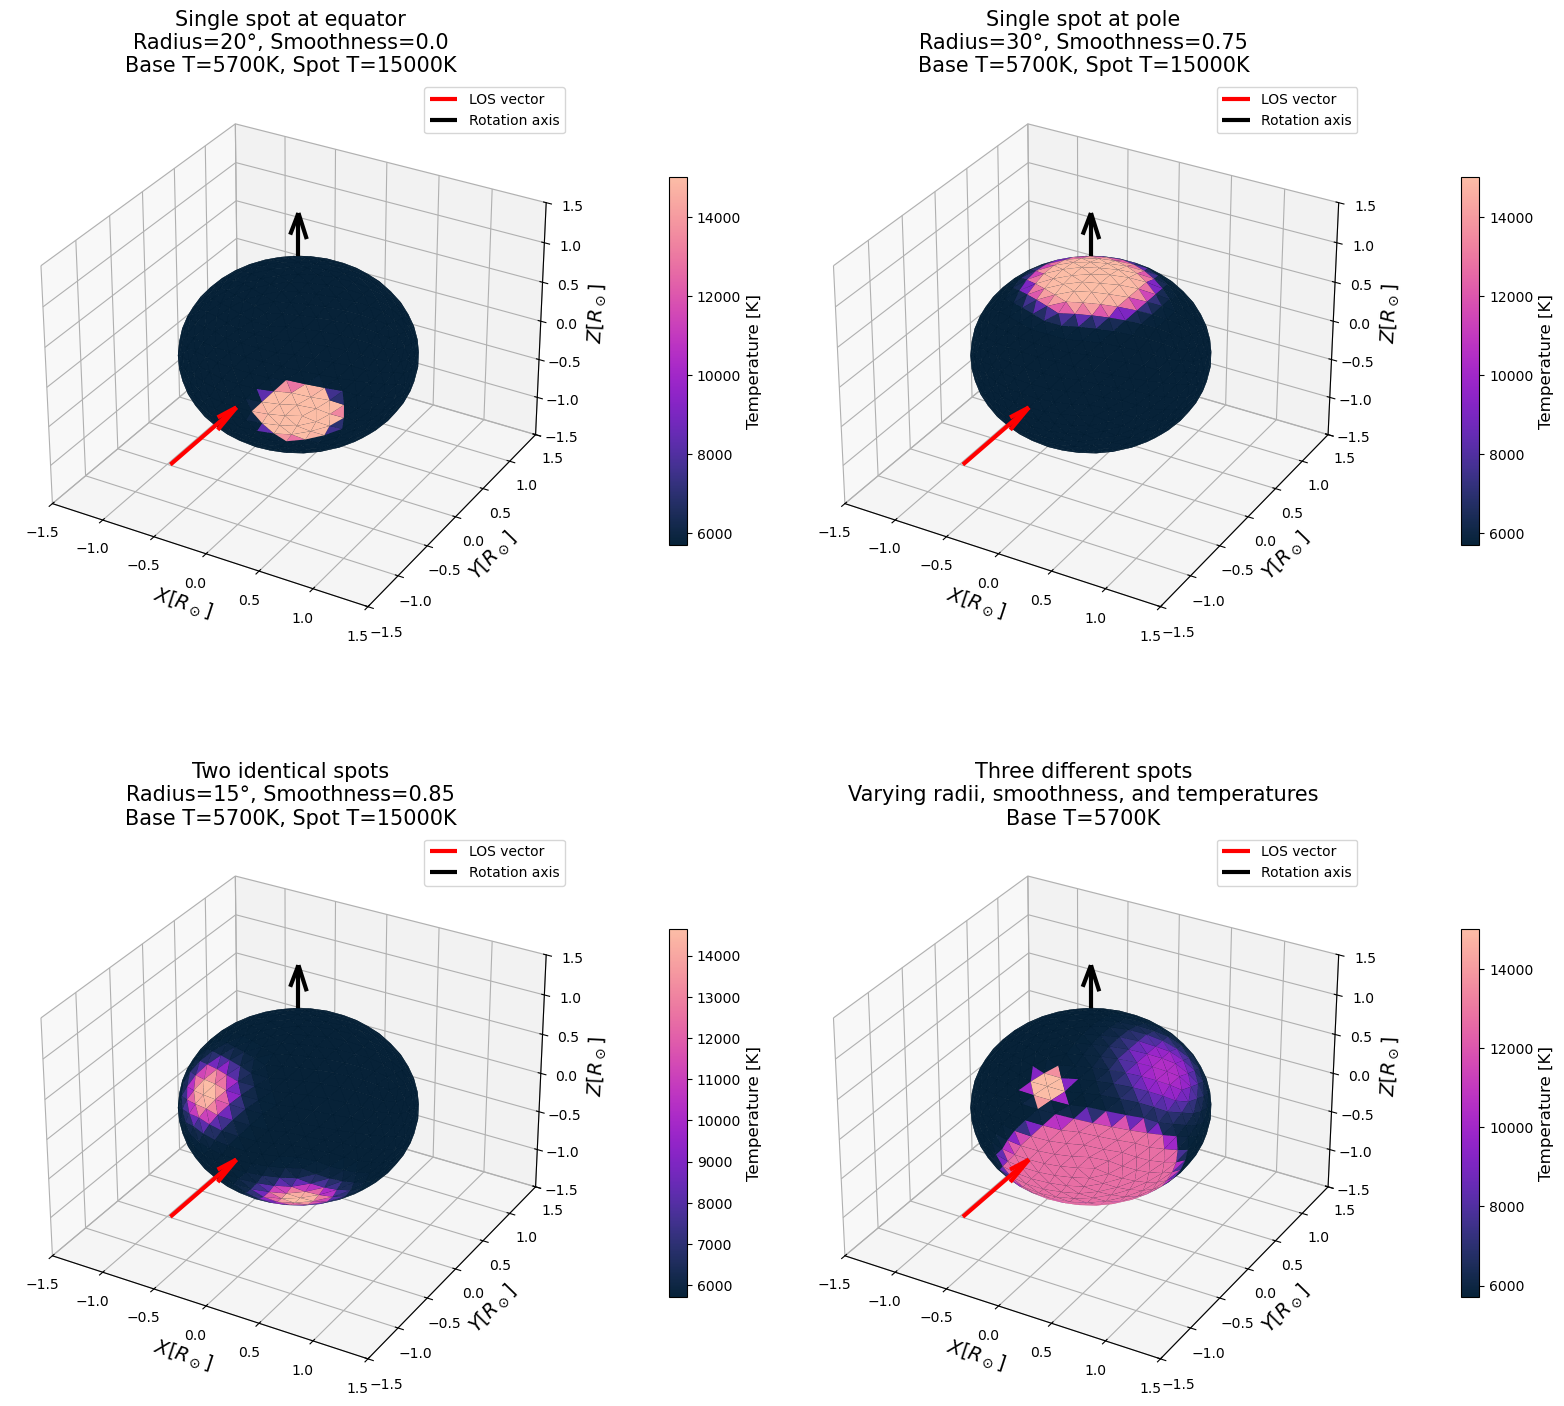

In [3]:
# Create a new figure for spherical spots
from spice.models.spots import add_spot, add_spots


fig, axes = plt.subplots(2, 2, figsize=(16, 16), subplot_kw={'projection': '3d'})

# Configuration 1: Single spot at equator
m_spot1 = add_spot(
    m,
    spot_center_theta=jnp.pi/2,  # equator
    spot_center_phi=5*jnp.pi/3,           # prime meridian
    spot_radius=20,              # 20 degrees
    parameter_delta=9300,
    parameter_index=0,
    smoothness=0.0
)
ax1 = plot_3D(m_spot1, property=0, axes=(fig, axes[0][0]), property_label="Temperature [K]")
axes[0][0].set_title(f"Single spot at equator\nRadius=20°, Smoothness=0.0\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 2: Single spot at pole with higher smoothness
m_spot2 = add_spot(
    m,
    spot_center_theta=0,         # north pole
    spot_center_phi=0,           # prime meridian
    spot_radius=30,              # 30 degrees
    parameter_delta=9300,
    parameter_index=0,
    smoothness=0.75               # smoother transition
)
ax2 = plot_3D(m_spot2, property=0, axes=(fig, axes[0][1]), property_label="Temperature [K]")
axes[0][1].set_title(f"Single spot at pole\nRadius=30°, Smoothness=0.75\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 3: Multiple spots with same parameters
m_spot3 = add_spots(
    m,
    spot_center_thetas=jnp.array([jnp.pi/3, 2*jnp.pi/3]),
    spot_center_phis=jnp.array([4*jnp.pi/3, 5*jnp.pi/3]), 
    spot_radii=jnp.array([15, 15]),                          # 15° radius for both
    parameter_deltas=jnp.array([9300, 9300]),
    parameter_indices=jnp.array([0, 0]),
    smoothness=jnp.array([0.85, 0.85])
)
ax3 = plot_3D(m_spot3, property=0, axes=(fig, axes[1][0]), property_label="Temperature [K]")
axes[1][0].set_title(f"Two identical spots\nRadius=15°, Smoothness=0.85\nBase T={base_temp}K, Spot T={base_temp+9300}K", fontsize=15)

# Configuration 4: Multiple spots with different parameters
m_spot4 = add_spots(
    m,
    spot_center_thetas=jnp.array([jnp.pi/3-jnp.pi/12, jnp.pi/3-jnp.pi/12, 2*jnp.pi/3-jnp.pi/12]),
    spot_center_phis=jnp.array([4*jnp.pi/3+jnp.pi/6, 4*jnp.pi/3+2*jnp.pi/3, 5*jnp.pi/3]),
    spot_radii=jnp.array([10, 20, 45]),                                # Different radii
    parameter_deltas=jnp.array([9300, 5000, 7000]),                    # Different temperature deltas
    parameter_indices=jnp.array([0, 0, 0]),
    smoothness=jnp.array([0.0, 0.9, 0.5])                              # Different smoothness values
)
ax4 = plot_3D(m_spot4, property=0, axes=(fig, axes[1][1]), property_label="Temperature [K]")
axes[1][1].set_title(f"Three different spots\nVarying radii, smoothness, and temperatures\nBase T={base_temp}K", fontsize=15)

plt.tight_layout()


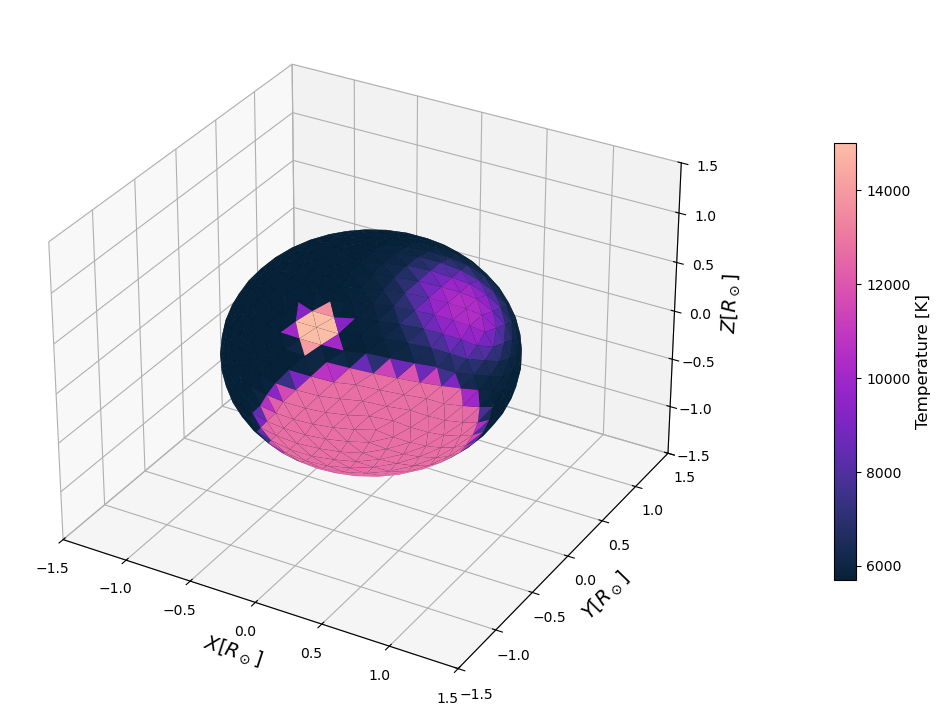

In [6]:
# Configuration 4: Multiple spots with different parameters
m_spot4 = add_spots(
    m,
    spot_center_thetas=jnp.array([jnp.pi/3-jnp.pi/12, jnp.pi/3-jnp.pi/12, 2*jnp.pi/3-jnp.pi/12]),
    spot_center_phis=jnp.array([4*jnp.pi/3+jnp.pi/6, 4*jnp.pi/3+2*jnp.pi/3, 5*jnp.pi/3]),
    spot_radii=jnp.array([10, 20, 45]),                                # Different radii
    parameter_deltas=jnp.array([9300, 5000, 7000]),                    # Different temperature deltas
    parameter_indices=jnp.array([0, 0, 0]),
    smoothness=jnp.array([0.0, 0.9, 0.5])                              # Different smoothness values
)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
ax = plot_3D(m_spot4, property=0, axes=(fig, ax), property_label="Temperature [K]", draw_los_vector=False, draw_rotation_axis=False)
plt.tight_layout()

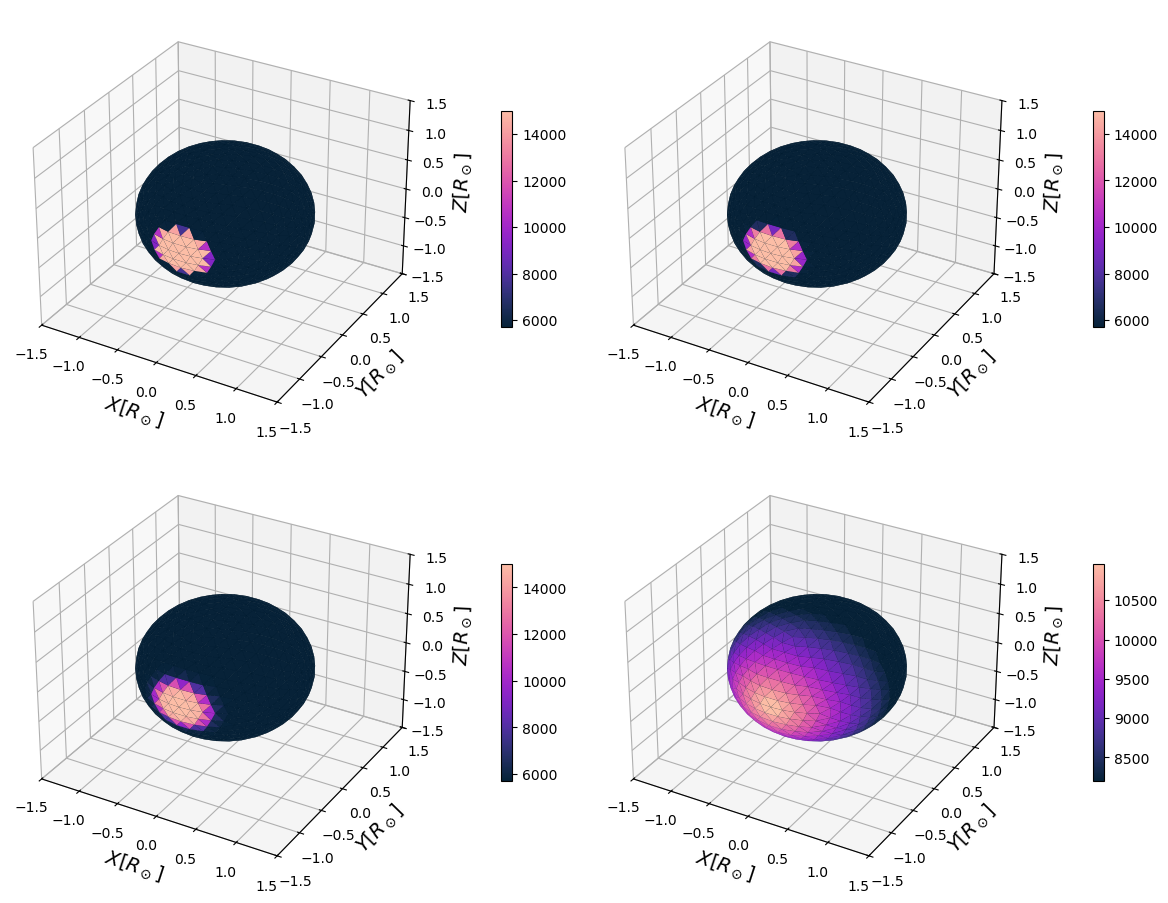

In [4]:
# Create a figure to demonstrate the effect of smoothness parameter on spot transition
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
axes2 = axes2.flatten()

# Base model
base_temp = 5700  # K

# Create spots with different smoothness values
smoothness_values = [0.0, 0.5, 0.75, 1.0]
spot_models = []

for i, smoothness in enumerate(smoothness_values):
    # Create a spot with the current smoothness value
    spot_model = add_spot(
        m,
        spot_center_theta=jnp.pi/2,  # equator
        spot_center_phi=3*jnp.pi/2,  # prime meridian
        spot_radius=20,              # 20 degrees
        parameter_delta=9300,        # temperature difference
        parameter_index=0,           # temperature parameter
        smoothness=smoothness        # varying smoothness
    )
    
    # Plot the model
    ax = plot_3D(spot_model, property=0, axes=(fig2, axes2[i]), property_label="", 
                 draw_los_vector=False, draw_rotation_axis=False)
    axes2[i].set_title("")
    
    # Store the model for later use if needed
    spot_models.append(spot_model)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)


/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


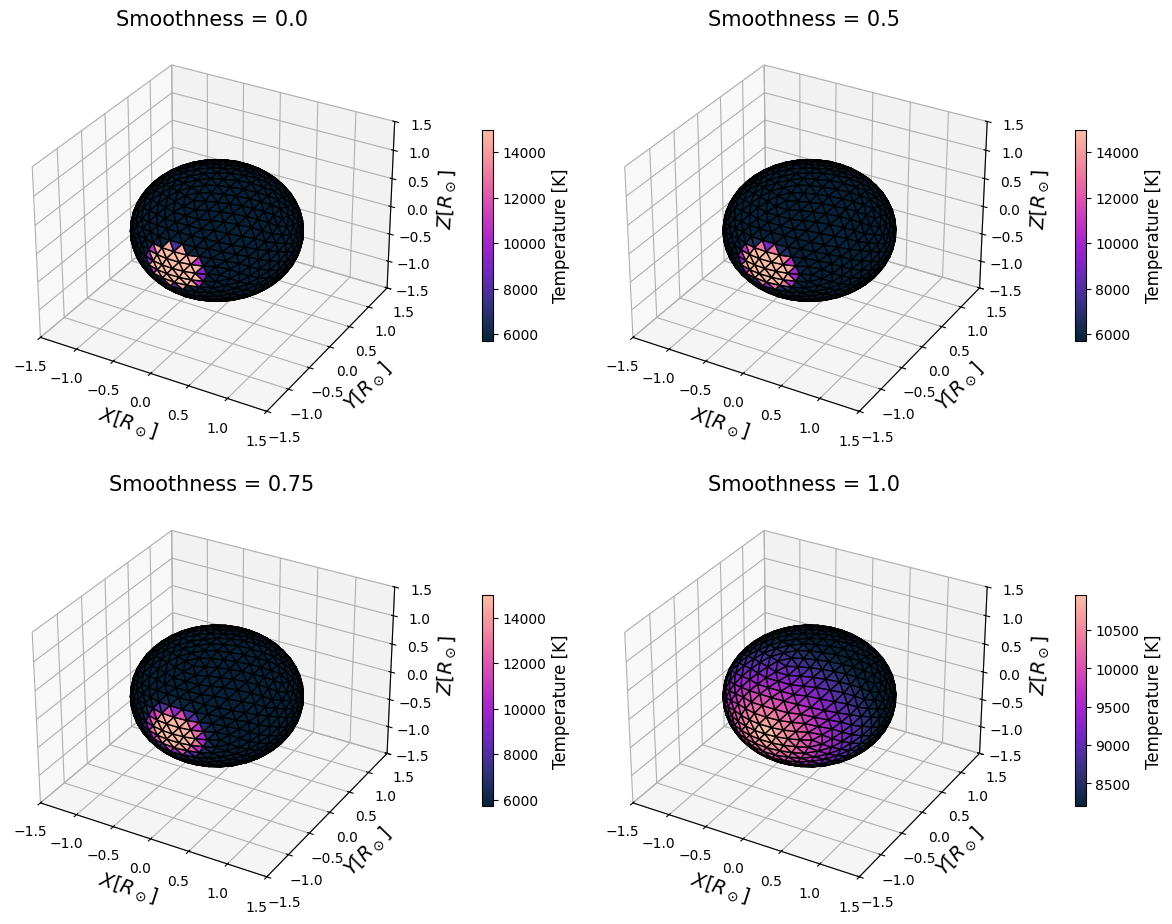

In [4]:
# Create a figure to demonstrate the effect of smoothness parameter on spot transition
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})
axes2 = axes2.flatten()

# Base model
base_temp = 5700  # K

# Create spots with different smoothness values
smoothness_values = [0.0, 0.5, 0.75, 1.0]
spot_models = []

for i, smoothness in enumerate(smoothness_values):
    # Create a spot with the current smoothness value
    spot_model = add_spot(
        m,
        spot_center_theta=jnp.pi/2,  # equator
        spot_center_phi=3*jnp.pi/2,  # prime meridian
        spot_radius=20,              # 20 degrees
        parameter_delta=9300,        # temperature difference
        parameter_index=0,           # temperature parameter
        smoothness=smoothness        # varying smoothness
    )
    
    # Plot the model
    ax = plot_3D(spot_model, property=0, axes=(fig2, axes2[i]), property_label="Temperature [K]",
                 draw_los_vector=False, draw_rotation_axis=False)
    axes2[i].set_title(f"Smoothness = {smoothness}", fontsize=15)
    
    # Store the model for later use if needed
    spot_models.append(spot_model)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

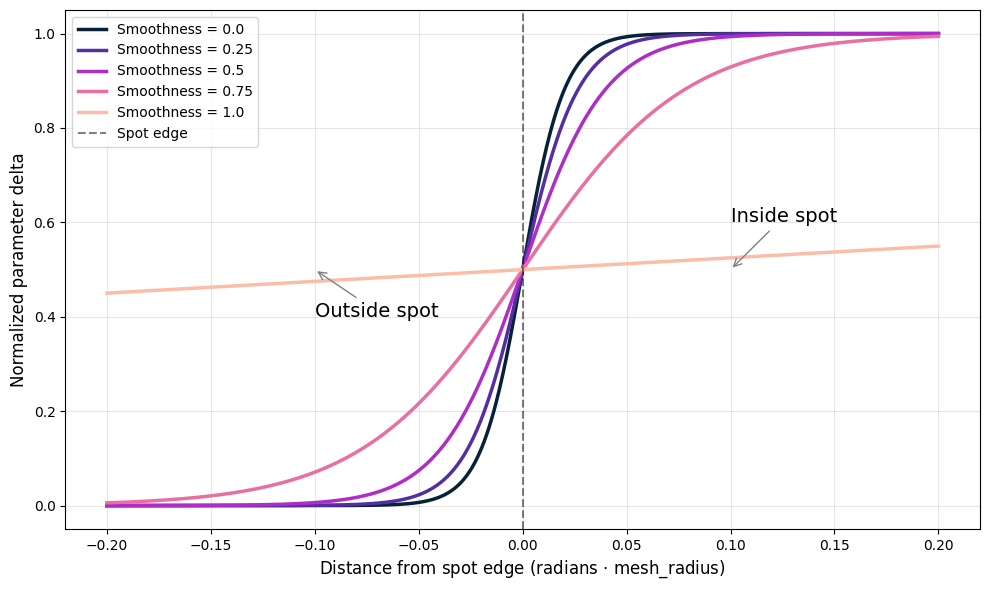

In [5]:
import cmasher as cmr

# Create a figure to demonstrate how parameter_delta varies with distance from spot edge
# for different smoothness values
fig3, ax3 = plt.subplots(figsize=(10, 6))

# Define a range of distances from the spot edge (negative = outside, positive = inside)
distances = np.linspace(-0.2, 0.2, 1000)  # in radians * mesh_radius

# Define the smoothness values to plot
smoothness_values = [0.0, 0.25, 0.5, 0.75, 1.0]
colors = cmr.bubblegum(np.linspace(0, 1, len(smoothness_values)))

# Set parameter difference
parameter_diff = 1.0  # normalized to 1.0 for visualization

for i, smoothness in enumerate(smoothness_values):
    # Calculate the normalized distances (using same scale factor as in spots.py)
    scale_factor = 0.01  # simplified from the original code
    normalized_distances = np.clip(distances / scale_factor, -100.0, 100.0)
    
    # Calculate adjusted smoothness (as in spots.py)
    adjusted_smoothness = (1.0 - smoothness) + 0.01 * smoothness
    
    # Calculate the parameter delta using sigmoid function
    parameter_deltas = 1 / (1 + np.exp(-normalized_distances * adjusted_smoothness))
    
    # Plot the result
    ax3.plot(distances, parameter_deltas, label=f"Smoothness = {smoothness}", 
             color=colors[i], linewidth=2.5)

# Add vertical line at spot edge
ax3.axvline(x=0, color='black', linestyle='--', alpha=0.5, label="Spot edge")

# Add labels and legend
ax3.set_xlabel("Distance from spot edge (radians $\cdot$ mesh_radius)", fontsize=12)
ax3.set_ylabel("Normalized parameter delta", fontsize=12)
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)

# Add annotations
ax3.annotate("Inside spot", xy=(0.1, 0.5), xytext=(0.1, 0.6),
             arrowprops=dict(arrowstyle="->", color="gray"), fontsize=14)
ax3.annotate("Outside spot", xy=(-0.1, 0.5), xytext=(-0.1, 0.4),
             arrowprops=dict(arrowstyle="->", color="gray"), fontsize=14)

plt.tight_layout()
